# Función para leer una imagen

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [6]:
img01=cv.imread('flowers.jpeg',cv.IMREAD_GRAYSCALE)
img02=cv.imread('flowers.jpeg')

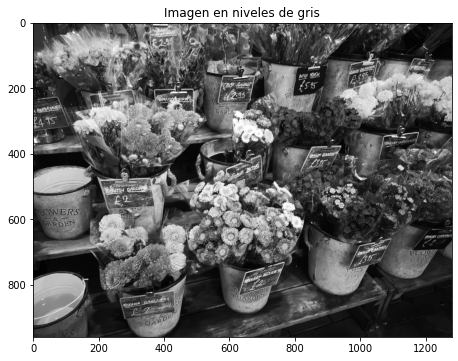

In [7]:
imshow("Imagen en niveles de gris",img01)

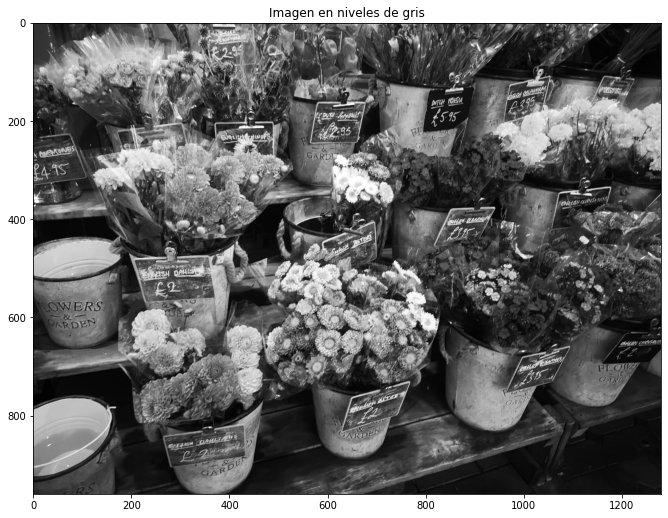

In [17]:
imshow("Imagen en niveles de gris",img01,15)

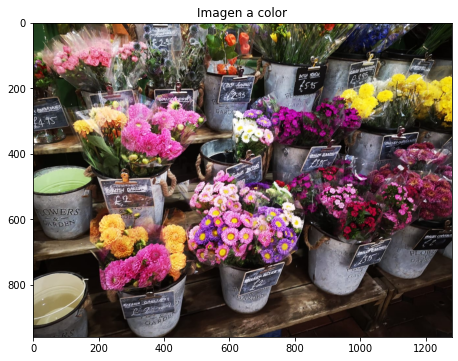

In [8]:
imshow("Imagen a color",img02)

# Repaso python

In [13]:
x=range(30,50)

In [14]:
x

range(30, 50)

In [18]:
for x in range(5):
    print(x)

0
1
2
3
4


In [15]:
for x in range(0,10):
    print(x)

0
1
2
3
4
5
6
7
8
9


## Ejercicio: recorrer un bloque de la imagen a color y ponerlo en color rojo

In [23]:
for fila in range(100,200):
    for columna in range(400,500):
        img02[fila,columna]=(0,0,200)
        

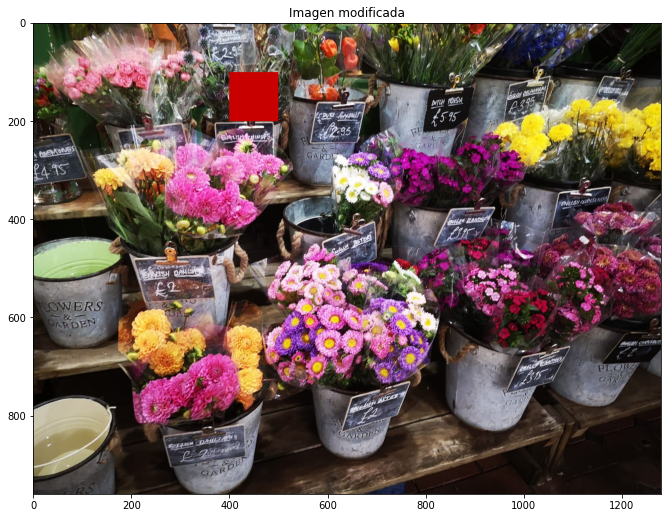

In [24]:
imshow("Imagen modificada",img02,15)

## Ejercicio: recorrer un bloque de la imagen en niveles de gris y ponerlo en blanco

In [25]:
for fila in range(100,200):
    for columna in range(400,500):
        img01[fila,columna]=255

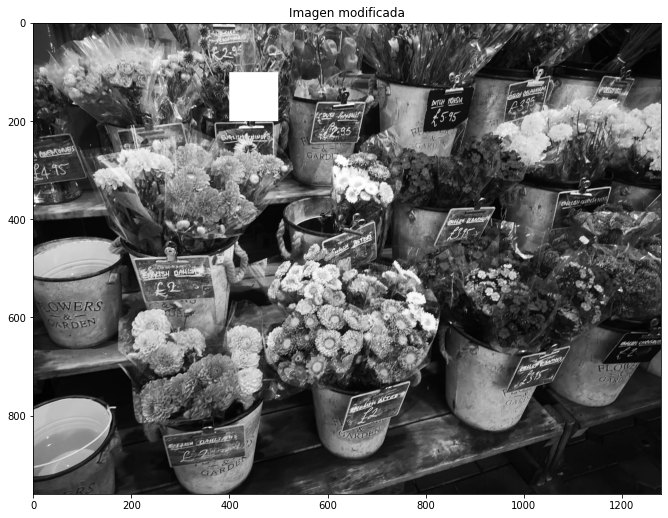

In [26]:
imshow("Imagen modificada",img01,15)

In [33]:
canales= cv.split(img02)

In [37]:
canales[0]

array([[28, 28, 28, ..., 13, 11,  8],
       [28, 28, 28, ..., 11,  9,  7],
       [28, 28, 28, ...,  9,  9,  7],
       ...,
       [40, 40, 39, ..., 14, 14, 14],
       [40, 40, 39, ..., 14, 14, 14],
       [40, 40, 39, ..., 14, 14, 14]], dtype=uint8)

## Obtención del histograma

https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

In [38]:
b_hist = cv.calcHist(canales,[0], None, [256], (0,256),False)
g_hist = cv.calcHist(canales,[1], None, [256], (0,256),False)
r_hist = cv.calcHist(canales,[2], None, [256], (0,256),False)
#g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
#r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

In [35]:
b_hist

array([[17800.],
       [ 3085.],
       [ 5838.],
       [ 9170.],
       [12114.],
       [13312.],
       [14648.],
       [14936.],
       [17959.],
       [18229.],
       [17079.],
       [17193.],
       [16417.],
       [16104.],
       [14878.],
       [13304.],
       [12552.],
       [12426.],
       [12510.],
       [11791.],
       [11164.],
       [10903.],
       [10552.],
       [10122.],
       [10018.],
       [ 9668.],
       [ 9464.],
       [ 9196.],
       [ 9424.],
       [ 9121.],
       [ 9177.],
       [ 9235.],
       [ 9116.],
       [ 8977.],
       [ 8451.],
       [ 8522.],
       [ 8277.],
       [ 7942.],
       [ 8002.],
       [ 8005.],
       [ 7995.],
       [ 7792.],
       [ 7670.],
       [ 7648.],
       [ 7685.],
       [ 7614.],
       [ 7662.],
       [ 7584.],
       [ 7402.],
       [ 7581.],
       [ 7543.],
       [ 7411.],
       [ 7444.],
       [ 7407.],
       [ 7366.],
       [ 7377.],
       [ 7331.],
       [ 7255.],
       [ 7089.

## Graficar histograma

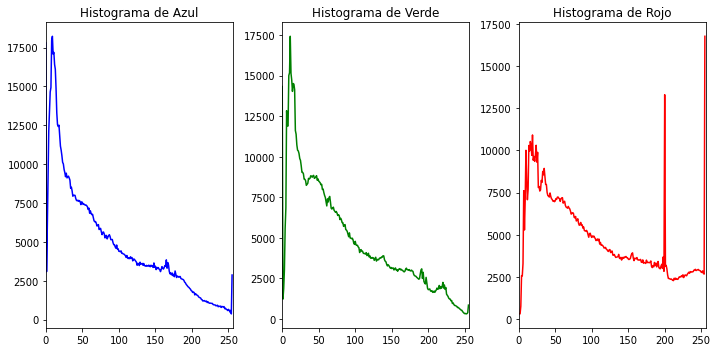

In [39]:
plt.figure(figsize=(10, 5))

# Histograma del canal Azul
plt.subplot(1, 3, 1)
plt.plot(b_hist, color='blue')
plt.title('Histograma de Azul')
plt.xlim([0, 256])

# Histograma del canal Verde
plt.subplot(1, 3, 2)
plt.plot(g_hist, color='green')
plt.title('Histograma de Verde')
plt.xlim([0, 256])

# Histograma del canal Rojo
plt.subplot(1, 3, 3)
plt.plot(r_hist, color='red')
plt.title('Histograma de Rojo')
plt.xlim([0, 256])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

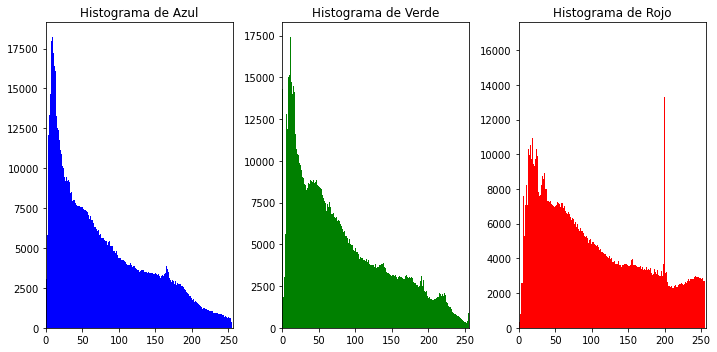

In [40]:
# Graficar los histogramas con barras
plt.figure(figsize=(10, 5))

# Histograma del canal Azul
plt.subplot(1, 3, 1)
plt.bar(range(256), b_hist.flatten(), color='blue', width=1.0)
plt.title('Histograma de Azul')
plt.xlim([0, 256])

# Histograma del canal Verde
plt.subplot(1, 3, 2)
plt.bar(range(256), g_hist.flatten(), color='green', width=1.0)
plt.title('Histograma de Verde')
plt.xlim([0, 256])

# Histograma del canal Rojo
plt.subplot(1, 3, 3)
plt.bar(range(256), r_hist.flatten(), color='red', width=1.0)
plt.title('Histograma de Rojo')
plt.xlim([0, 256])

# Mostrar los gráficos
plt.tight_layout()
plt.show()


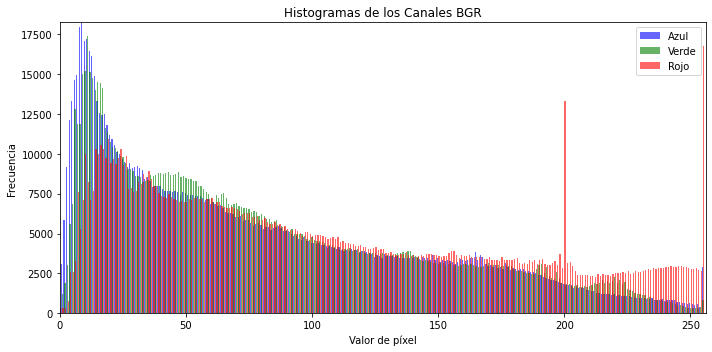

In [46]:
import numpy as np
plt.figure(figsize=(10, 5))
x = np.arange(256)
# Histograma del canal Azul
plt.bar(x - 0.3, b_hist.flatten(), width=0.5, color='blue', label='Azul', alpha=0.6)

# Histograma del canal Verde
plt.bar(x, g_hist.flatten(), width=0.5, color='green', label='Verde', alpha=0.6)

# Histograma del canal Rojo
plt.bar(x + 0.3, r_hist.flatten(), width=0.5, color='red', label='Rojo', alpha=0.6)

# Añadir título y etiquetas
plt.title('Histogramas de los Canales BGR')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])
plt.ylim([0, max(max(b_hist), max(g_hist), max(r_hist)) + 10])
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Operaciones básicas con pixels

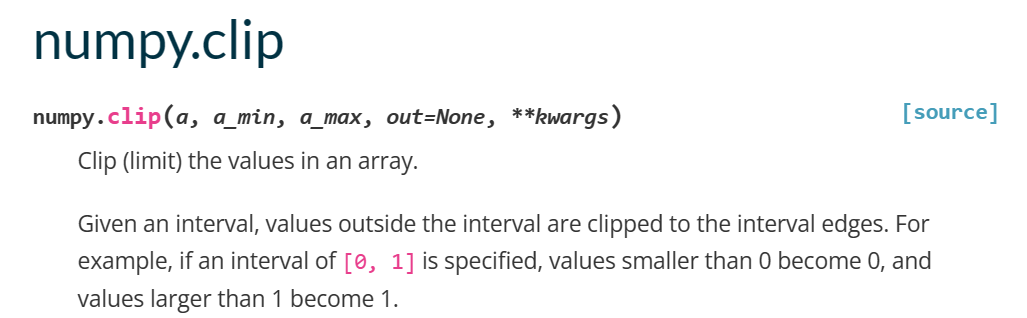

Si por ejemplo tenemos: img1
img1[0, 0] = [150, 100, 50]
img2[0, 0] = [100, 50, 200]
Componente Azul: 150 - 100 = 50
Componente Verde: 100 - 50 = 50
Componente Rojo: 50 - 200 = -150 (que sería corregido a un valor dentro del rango 0-255 usando clip() o astype(np.uint8))


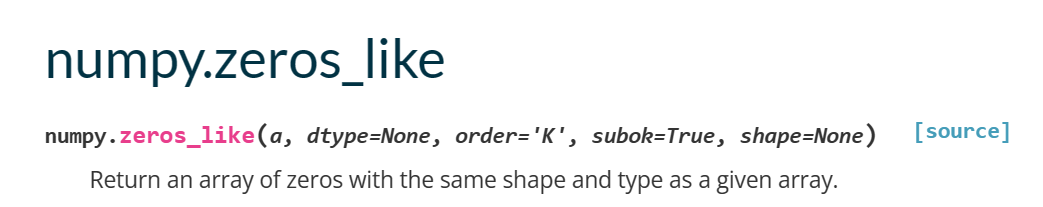

In [52]:
img1= imagen1[100:200, 100:400]
img2= imagen1[200:300,200:500]

In [70]:
ceros = np.zeros_like(img1)
unos = np.ones_like(img1)
img_copia = img1.copy()

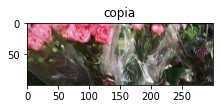

In [73]:
imshow("copia",img_copia)

In [71]:
# Resta de imágenes sin convertir a uint8
img_diff = img1 - img2

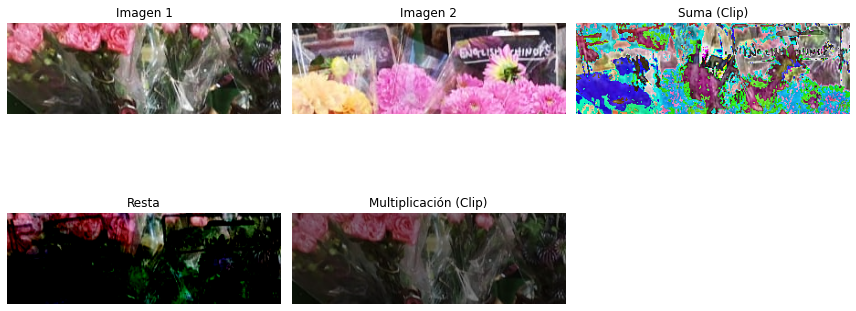

In [72]:
imagen1 = cv.imread('flowers.jpeg')
#imagen1[fila_inicio: fila_fin, columna_inicio: columna_fin]

# Asegurarse de que ambas imágenes tengan el mismo tamaño
if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño para realizar operaciones")

# Sumar las imágenes
img_sum = cv.add(img1, ruido)  # También puedes usar img_sum = img1 + img2

# Sumar las imágenes con control de valores fuera de rango utilizando clip
img_sum_clip = np.clip(img1 + img2, 0, 255)

# Restar las imágenes
img_diff = cv.subtract(img1, img2)  # img_diff = img1 - img2

# Multiplicar las imágenes
img_mult = np.multiply(img1, img2)  # Esta operación debe ser controlada para evitar desbordes

# Multiplicación con clip para evitar valores fuera de rango
img_mult_clip = np.clip(img1 * 0.5, 0, 255)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Imagen 1")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Imagen 2")
plt.axis('off')

plt.subplot(2, 3, 3)
#plt.imshow(cv.cvtColor(img_sum_clip.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.imshow(cv.cvtColor(img_sum_clip, cv.COLOR_BGR2RGB))
plt.title("Suma (Clip)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(img_diff.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title("Resta")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(img_mult_clip.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title("Multiplicación (Clip)")
plt.axis('off')

plt.tight_layout()
plt.show()
